# Simple Linear Regression

1972022 - Sthefan Marley Tanza

### Step 1 - Membuat dataset

Pada variabel pizza terdapat dua buah list yaitu diameter dan harga, kedua key tersebut terasosiasi satu sama lain, lalu dimuat kedalam objek pizza_df dalam bentuk data frame menggunakan pandas.

In [1]:
import pandas as pd

pizza = {
    'diameter' : [6,8,10,14,18],
    'harga' : [7,9,13,17.5,18]
}
pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


### Step 2 - Visualisasi data

Visualisasi data menggunakan matplotlib.pyplot. Pada pembuatan plot terdapat 3 buah parameter yaitu kind, x, dan y. Parameter kind artinya adalah jenis plot, saat ini kita membuat scatter plot, lalu x dan y merupakan sumbu nya.

xlabel dan ylabel digunakan untuk memberikan label pada sumbu.
xlim dan ylim digunakan untuk membuat range dari sumbu, misalnya xlim(0,25) maka sumbu x memiliki range dari 0 sampai 25.

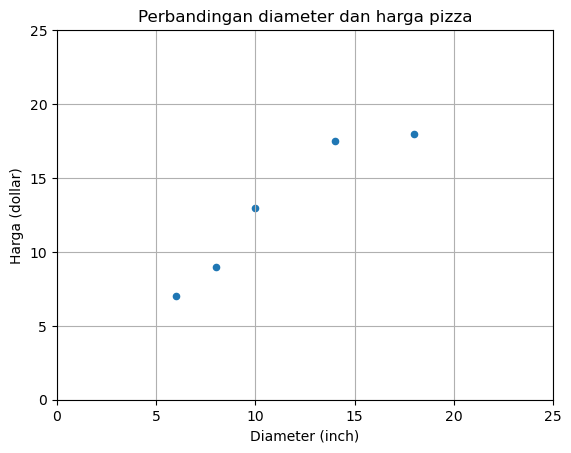

In [2]:
import matplotlib.pyplot as plt

pizza_df.plot(kind = 'scatter', x = 'diameter', y = 'harga')

plt.title("Perbandingan diameter dan harga pizza")
plt.xlabel("Diameter (inch)")
plt.ylabel("Harga (dollar)")
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

### Step 3 - Penyesuaian dataset

Pada step ini kita akan membagi feature dan target kedalam dua variabel terpisah. Saat ini kita akan mencoba untuk memprediksi harga pizza jika diketahui diameternya.

Pertama, kita akan melakukan konversi struktur data dari yang awalnya menggunakan pandas dataframe menjadi numpy array.

In [6]:
import numpy as np

X = np.array(pizza_df['diameter']) #feature
y = np.array(pizza_df['harga']) #target

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


Seperti yang dapat dilihat pada kode diatas, variabel X yang digunakan untuk menampung nilai features hanya terdiri dari 1 dimensi saja. Sedangkan, model machine learning yang ada pada scikit learn membutuhkan sekumpulan nilai features yang ditampung dalam array 2 dimensi. Maka sekarang kita akan melakukan reshape terhadap variabel X.

In [9]:
X = X.reshape(-1,1)
X.shape

(5, 1)

Sekarang variabel X menampung array 2 dimensi.

In [10]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

### Step 4 - Melakukan training model

Pada tahap ini, kita akan melakukan training model dengan metode Linear Regression. Proses training ini dapat dilakukan dengan menggunakan method fit(). Method fit menerima 2 buah parameter yaitu features dan target.

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Pada tahap ini model yang tadi dibuat sudah berubah statusnya menjadi trained model.

### Step 5 - Visualisasi model

Linear model yang dihasilkan akan berupa 2 garis lurus, untuk dapat memvisualisasikan persamaan garis ini pertama kita akan mempersiapkan dua buah nilai yaitu:
- Nilai 0 dan 25 pada X, nilai tersebut ditentukan karena kita akan melakukan plotting pada area ukuran 25x25.

Kedua nilai tersebut akan dibentuk sebagai numpy array. Karena array ini akan digunakan sebagai feature perlu dilakukan reshape agar menghasilkan array 2 dimensi.

In [13]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

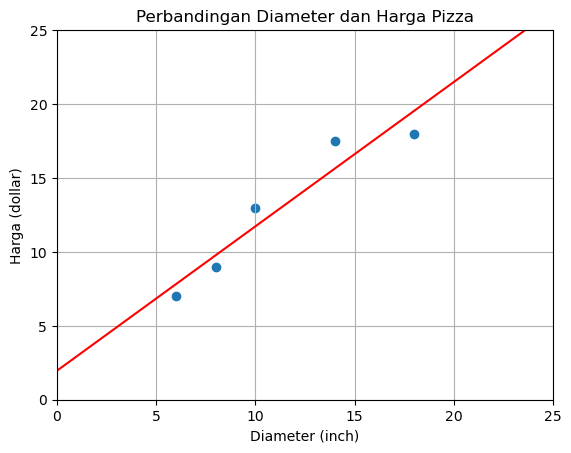

In [15]:
plt.scatter(X, y) # ini adalah plot yang berwarna biru
plt.plot(X_vis, y_vis, '-r') # ini adalah plot yang berbentuk garis merah

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Garis merah yang terbentuk pada plot diatas memiliki formula sebagai berikut:
Formula Linear Regression: 

$
y = \alpha + \beta x
$

- $y$: response variable / target
- $x$: explanatory variable / features
- $\alpha$: intercept / titik pada sumbu y dimana garis linear yang terbentuk menabrak sebuah titik
- $\beta$: slope / tingkat kemiringan dari garis linear yang terbentuk

In [16]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


### Step 6 - Mencari nilai slope

Nilai slope pada nilai linear regression bisa diperoleh dengan memanfaatkan formula berikut:
$$\beta = \frac{cov(x, y)}{var(x)}$$

In [17]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


Method flatten digunakan untuk mengembalikan bentuk dari variabel X.

#### Variance

Nilai variance dapat dihitung dengan menggunakan np.var. Pada np.var dibutuhkan 2 buah parameter yaitu X yang sudah di flatten, dan ddof.

In [18]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 23.2


#### Covariance

Nilai covariance dapat dihitung dengan menggunakan np.cov

In [19]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

Mengambil nilai 22.65 dengan menggunakan [0][1]

In [20]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


#### Slope

In [21]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 0.976293103448276


### Step 7 - Mencari nilai intercept

In [22]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: 1.9655172413793096


### Step 8 - Memprediksi harga pizza

Memprediksi harga pizza berdasarkan 3 nilai diameter

In [23]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [24]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [25]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} predilsi harga: {hrg}')

Diameter: [12] predilsi harga: 13.681034482758621
Diameter: [20] predilsi harga: 21.491379310344826
Diameter: [23] predilsi harga: 24.42025862068965


### Step 9 - Evaluasi simple linear regression model

#### Training dan Testing Dataset

In [26]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

#### Training simple linear regression model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared ($R^2$)

In [28]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


Semakin nilai R-squared  mendekati 1 semakin baik, semakin mendekati 0 maka semakin buruk.

#### Mencari nilai R-squared($R^2)$

$$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$$
$$SS_{res} =  \sum_{i=1}^{n}(y_i - f(x_i))^2$$
$$SS_{tot} =  \sum_{i=1}^{n}(y_i - \bar{y})^2$$

$SSres$

In [29]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


$SStot$

In [30]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


$R^2$

In [31]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
